##Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
#dataset have?

In [128]:
import pandas as pd
import seaborn as sns
import numpy as np

In [129]:
df=pd.read_csv('economy.csv')

In [203]:
import pandas as pd

# Define the file path of your CSV file
file_path = 'economy.csv'

# Define the data types for categorical columns (defaulting to string)
dtype_dict = {'categorical_column1': str, 'categorical_column2': str,
              'categorical_column3': str,'categorical_column4': str,
              'categorical_column5': str,'categorical_column6': str,
             'categorical_column7': str,'categorical_column8': str,
             'categorical_column9': str,}

# Read the CSV file with specified data types
df = pd.read_csv(file_path, dtype=dtype_dict)

# Now, df contains the CSV data with categorical columns having default data type as string


In [204]:
df.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [207]:
df.shape

(206774, 11)

##Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

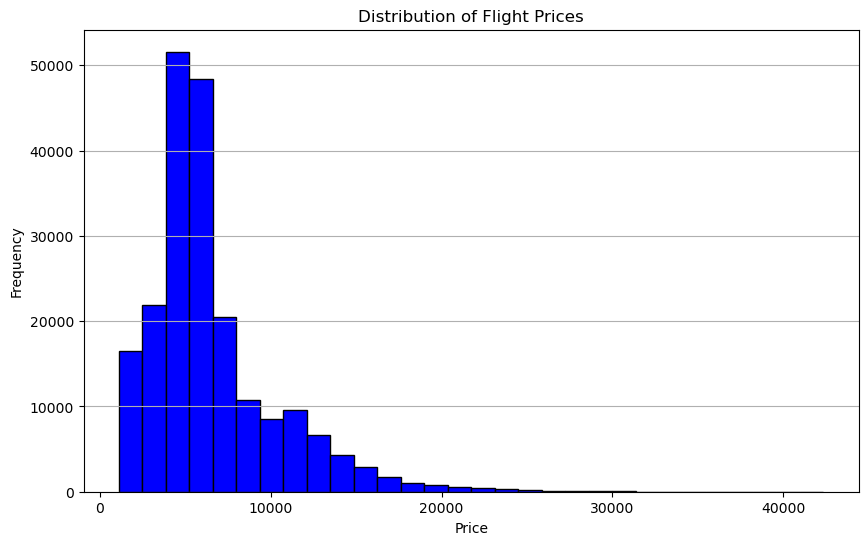

In [210]:
import matplotlib.pyplot as plt
df['price'] = df['price'].str.replace(',', '').astype(float)

# Create a histogram to visualize the distribution of flight prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [214]:
min_price = df['price'].min()
max_price = df['price'].max()

# Print the results
print(f'Minimum Price: {min_price}')
print(f'Maximum Price: {max_price}')

Minimum Price: 1105.0
Maximum Price: 42349.0


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

In [217]:
df=pd.read_csv('economy.csv')

In [218]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [221]:
print('Data type of price column:', df['price'].dtype)

Data type of price column: object


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

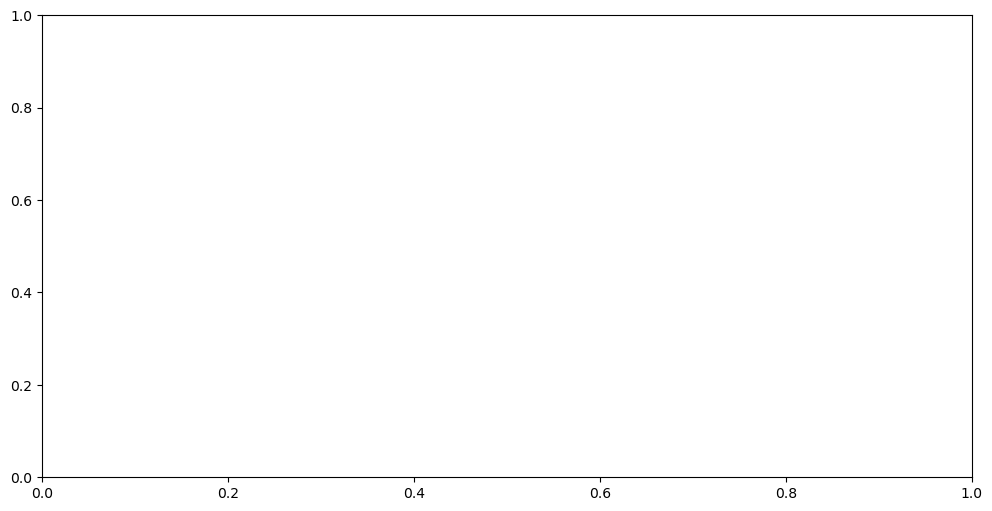

In [223]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['airline'] == airline]['price'] for airline in df['airline'].unique()], labels=df['airline'].unique())
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Prices of Flights by Airline')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

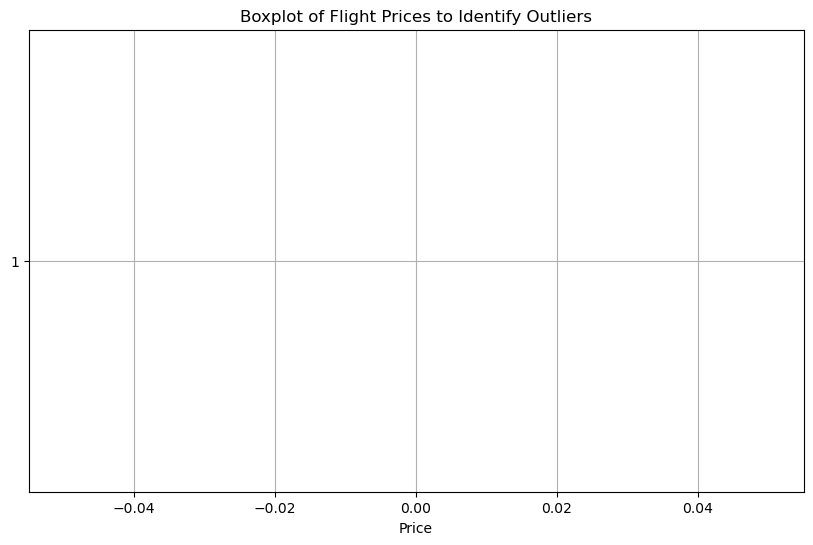

In [201]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Flight Prices to Identify Outliers')
plt.xlabel('Price')
plt.grid(True)
plt.show()

The boxplot above is used to identify potential outliers in the flight prices. Outliers are represented by points that
lie outside the whiskers of the boxplot. These outliers indicate prices that are significantly higher or lower than the 
majority of the data.

Outliers can impact the analysis by:

Skewing the mean and other statistical measures, making them less representative of the typical values.
Influencing assumptions of statistical tests, which often assume a normal distribution without extreme values.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

To identify the peak travel season from the Flight Price dataset, I would analyze the following features:

Date of Travel: This is crucial as it will allow us to observe trends over different months and possibly days of the week. 
By aggregating the data by month, we can see which months have the highest number of flights booked, indicating higher demand
and possibly higher prices.

Price: Observing how flight prices fluctuate over the year can give insights into demand. Higher prices often correlate with
higher demand periods.

Number of Flights: Counting the number of flights per day or month can directly show when more people are traveling.

Steps to Analyze:
Prepare the Data: Ensure the 'Date' column is in datetime format and extract the month for easier analysis.
Aggregate Data: Group the data by month to calculate the average price and count the number of flights.
Visualization:
Line Graph: Plot a line graph showing the average price per month.
Bar Chart: Display a bar chart with the number of flights per month.
Presentation to the Boss:
Summary Slide: Start with a summary of key findings, highlighting the months identified as peak season.
Data Visualizations: Show the graphs that clearly depict the trends in prices and flight counts over the months.
Analysis Explanation: Explain how the data was analyzed and why certain months were identified as peak season.
Recommendations: Based on the findings, suggest how the travel agency can capitalize on this information, such as by
offering early booking discounts during peak months or promoting off-peak travel.

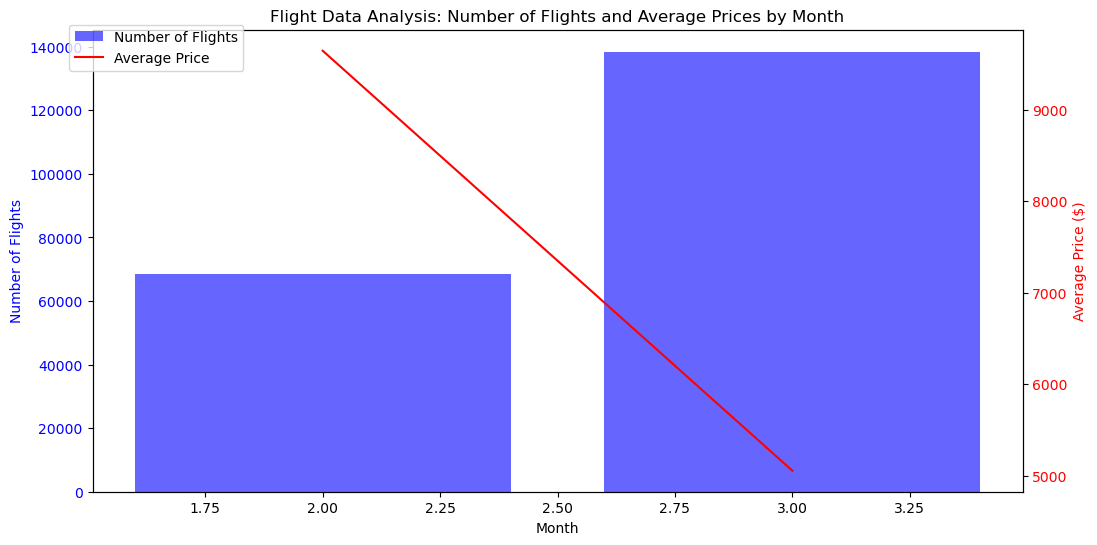

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'economy.csv'
df = pd.read_csv(file_path)

# Ensure the 'date' column is in datetime format and extract the month
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['month'] = df['date'].dt.month

# Clean the 'price' column by removing commas and converting to float
df['price'] = df['price'].str.replace(',', '').astype(float)

# Group data by month to calculate average price and count flights using 'num_code'
monthly_data = df.groupby('month').agg({'price': 'mean', 'num_code': 'count'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for number of flights
ax1.bar(monthly_data['month'], monthly_data['num_code'], color='b', alpha=0.6, label='Number of Flights')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Flights', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line graph for average price
ax2 = ax1.twinx()
ax2.plot(monthly_data['month'], monthly_data['price'], color='r', label='Average Price')
ax2.set_ylabel('Average Price ($)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Flight Data Analysis: Number of Flights and Average Prices by Month')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [226]:
import pandas as pd

df = pd.read_csv('playstore.csv.csv', encoding='utf-8')
print('Dataset dimensions:', df.shape)

Dataset dimensions: (10841, 13)


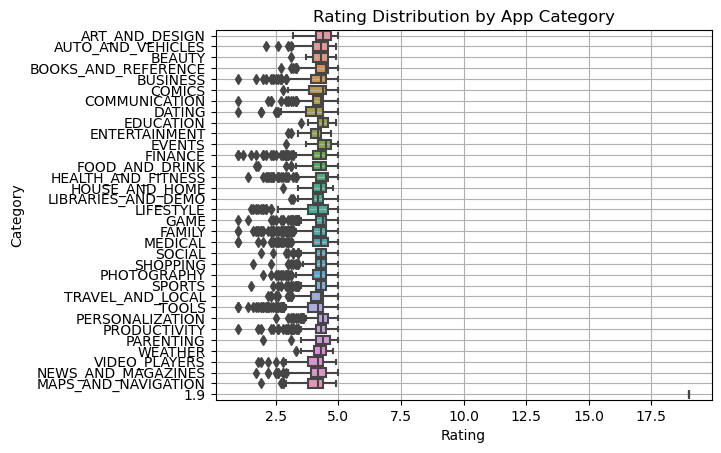

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color for visibility on the black screen
plt.figure(facecolor='white')

# Create a boxplot to compare ratings by category
sns.boxplot(data=df, x='Rating', y='Category', orient='h')
plt.title('Rating Distribution by App Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.grid(True)
plt.show()

In [ ]:
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [230]:
missing_values = df.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Impact on Analysis:
Rating: A significant number of missing ratings can skew analysis related to app quality or popularity. It might be necessary 
to impute these values or analyze them separately to avoid bias.
Type: The missing value in the Type column could be critical if analyzing paid vs. free apps, as it determines the app's
monetization strategy.
Content Rating: Missing content ratings could affect analyses related to user demographics or app appropriateness for
different age groups.
Current Ver and Android Ver: Missing values in these columns could impact analyses related to app compatibility or the 
effect of updates on app performance.
Depending on the analysis goals, you might consider imputation strategies or excluding rows with missing data in critical 
columns.

In [ ]:
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [235]:
df['Size'] = df['Size'].str.replace(',', '').str.replace('+', '')

# Attempt conversion again
try:
    df['Size_numeric'] = df['Size'].replace('Varies with device', None).str.replace('M', '', regex=False).str.replace('k', '', regex=False).astype(float)
    df['Size_numeric'] = df['Size_numeric'].apply(lambda x: x if x > 100 else x * 1000 if x else None)  # Convert kilobytes to megabytes
    print('Conversion successful.')
except Exception as e:
    print('Error in conversion:', e)

Conversion successful.


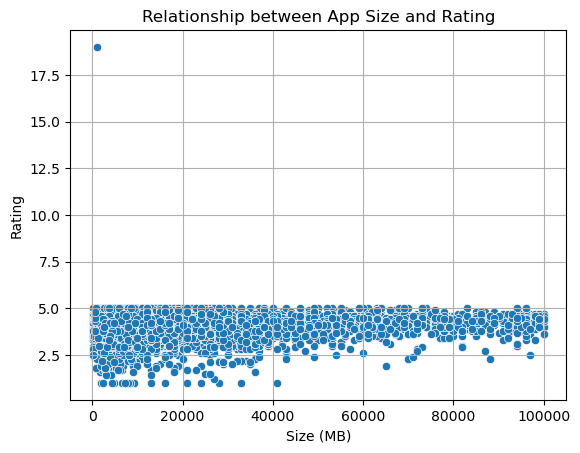

In [237]:
plt.figure(facecolor='white')
sns.scatterplot(data=df, x='Size_numeric', y='Rating')
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [240]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800.0


In [248]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [250]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [266]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [382]:
char_to_remove = ["+","$","Everyone","''"]
cols_to_clean = ['Price','Installs']
for item in char_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,"")

In [384]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '',
       '1.20', '1.04'], dtype=object)

ValueError: could not convert string to float: ''

In [407]:
category=pd.DataFrame(df['Category'].value_counts())
category.rename(columns = {'Category':'Count'},inplace = True)

In [409]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

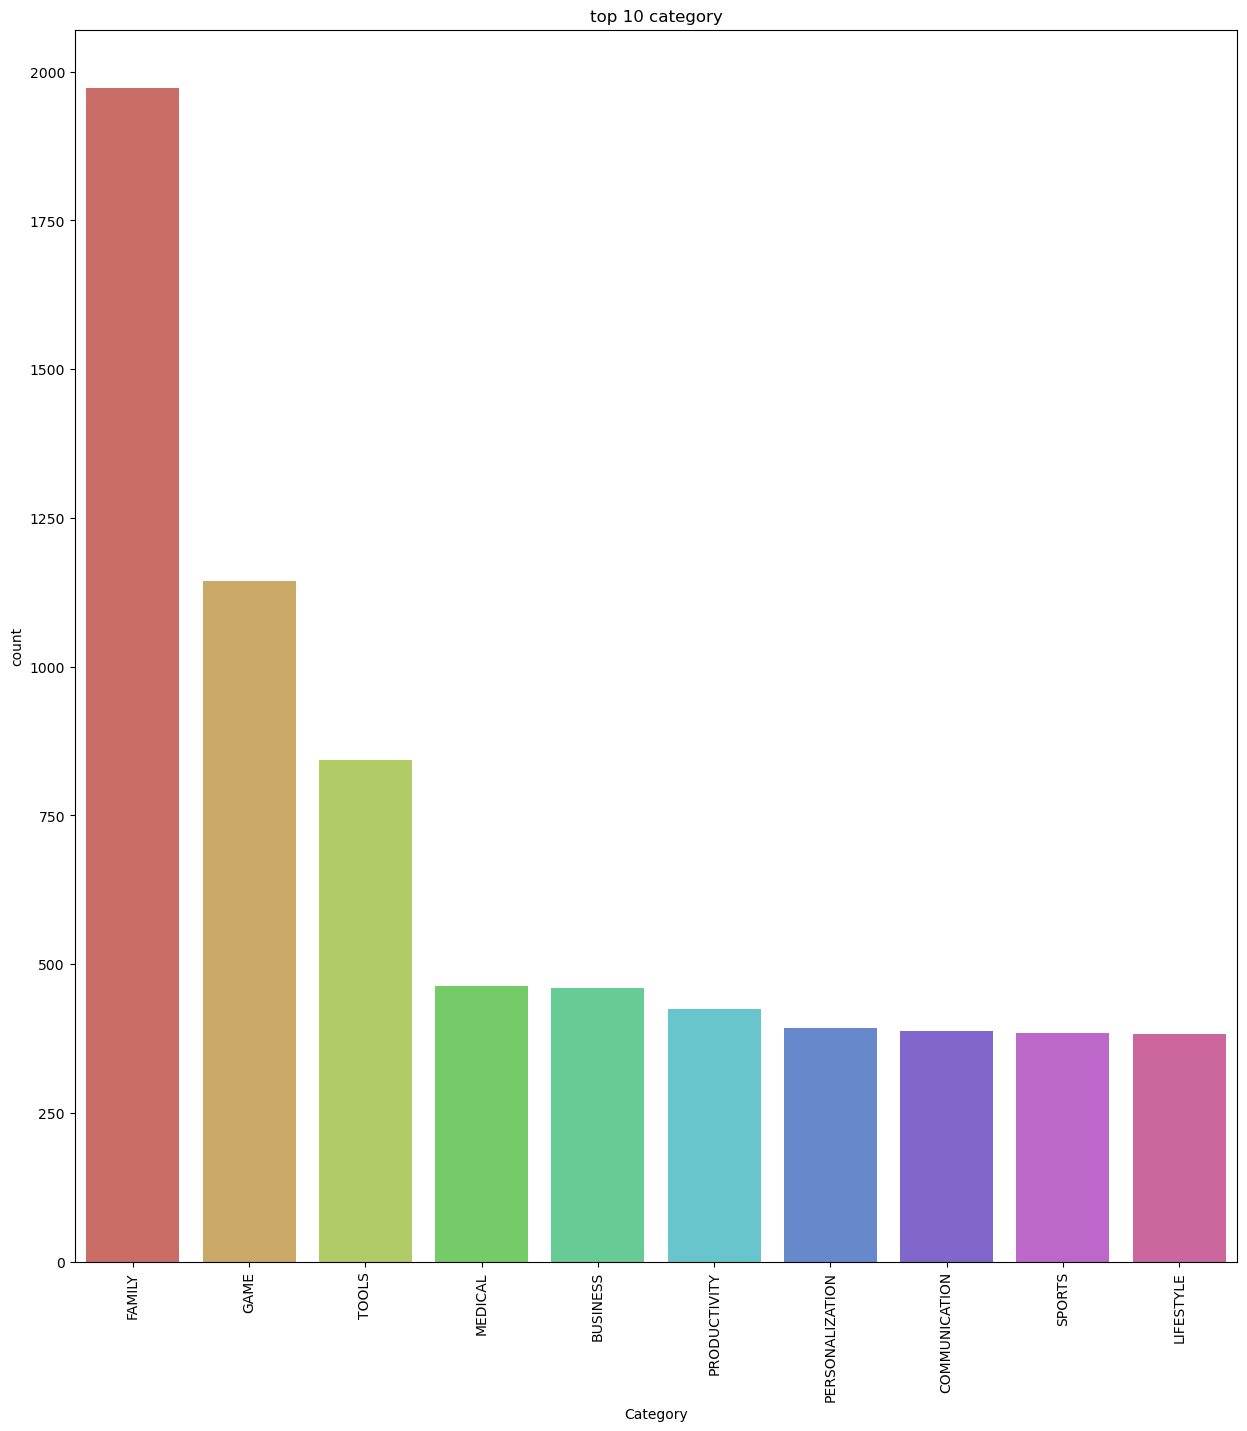

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,16))
sns.barplot(x=category.index[:10],y='count',data = category[:10],palette='hls')
plt.title('top 10 category')
plt.xticks(rotation=90)
plt.show()

i would recommend to make a app in family category

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store dataset, several features can be analyzed. Here are some key features to consider:

Number of Downloads: The number of downloads indicates the popularity and success of an app. Apps with higher download counts are generally more successful.
Ratings and Reviews: Analyzing average ratings and the number of reviews can provide insights into user satisfaction and engagement with the app.
App Category and Genre: Certain app categories and genres might be more lucrative or have a larger user base. Analyzing which categories and genres the successful developers focus on can be beneficial.
Price: Understanding the pricing strategy of developers (free vs. paid apps) can provide insights into their success.
Updates Frequency: Developers who frequently update their apps may have higher user engagement and satisfaction levels.
App Size: The size of the app can influence its download and installation rates. Analyzing app sizes can provide insights into user preferences.
Developer Reputation: Analyzing the reputation of developers based on past successful apps and user feedback can be valuable.
As for data visualizations to present the findings, here are some options:

Bar Charts: Use bar charts to visualize the number of downloads, ratings, and reviews for each developer. This can provide a quick comparison of developer success metrics.
Pie Charts: Pie charts can be used to show the distribution of apps across different categories and genres, helping identify which categories are more successful.
Scatter Plots: Scatter plots can help visualize the relationship between different metrics such as downloads vs. ratings, or downloads vs. app size. This can help identify any correlations between these variables.
Box Plots: Box plots can be used to visualize the distribution of ratings or number of downloads across different developer groups, helping identify outliers and trends.
Heatmaps: Heatmaps can be used to visualize the average ratings or number of downloads across different app categories and genres, providing insights into which categories are more successful.
Line Charts: Line charts can be used to visualize trends over time, such as the frequency of app updates or changes in ratings over time.
By analyzing these features and presenting the findings through appropriate data visualizations, the mobile app development company can make informed recommendations regarding the most successful app developers in the Google Play Store dataset.






